In [1]:
import os
os.environ['J_NOTEBOOK'] = '1'

from preprocess.preprocess import *
import PARAMETERS
PARAMETERS.DATASET = 'DRIVE'

import pandas as pd
import numpy as np

In [2]:
preprocess = Preprocess(height=608, width=576)
masks_path = f'../dataset/{PARAMETERS.DATASET}/training/mask/'
masks = sorted(os.listdir(masks_path))[:14]

n_pixels = {}
for i, mask_path in enumerate(masks):
    mask = preprocess.read_img(masks_path + mask_path)
    n_pixels[i] = np.sum(mask > 100)

n_pixels

{0: 225600,
 1: 227686,
 2: 228187,
 3: 227726,
 4: 227362,
 5: 225092,
 6: 227826,
 7: 227327,
 8: 227309,
 9: 227259,
 10: 227701,
 11: 224944,
 12: 227738,
 13: 226542}

In [3]:
pixel_ref = {}

for k, v in n_pixels.items():
    upper = np.sum(np.array(list(n_pixels.values()))[:k+1])
    pixel_ref[k] = (upper - n_pixels[k], upper)

pixel_ref

{0: (0, 225600),
 1: (225600, 453286),
 2: (453286, 681473),
 3: (681473, 909199),
 4: (909199, 1136561),
 5: (1136561, 1361653),
 6: (1361653, 1589479),
 7: (1589479, 1816806),
 8: (1816806, 2044115),
 9: (2044115, 2271374),
 10: (2271374, 2499075),
 11: (2499075, 2724019),
 12: (2724019, 2951757),
 13: (2951757, 3178299)}

In [4]:
cv_folds = {}

for i, j in enumerate(range(0, 14, 3)):
    cv_folds[i] = (pixel_ref[j][0], pixel_ref[min(j+2, 13)][1])
    
cv_folds

{0: (0, 681473),
 1: (681473, 1361653),
 2: (1361653, 2044115),
 3: (2044115, 2724019),
 4: (2724019, 3178299)}

In [5]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 6
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.CHANNEL = None
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

In [6]:
from main import load_datasets_for_lbp_operator, init_clf_and_fit

parent_path = '../'
for i, lbp_operator in enumerate(['default', 'riu', 'riu2', 'nriuniform', 'var']):
    PARAMETERS.LBP_METHOD = lbp_operator
    PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
    if i == 0:
        df_train, df_test, y_train, y_test = load_datasets_for_lbp_operator(parent_path)
    else:
        temp_datasets = load_datasets_for_lbp_operator(parent_path, discard_columns=True)
        df_train = pd.concat([df_train, temp_datasets[0]], axis=1)
        df_test = pd.concat([df_test, temp_datasets[1]], axis=1)

In [7]:
print(df_train.columns)
display(df_train)

Index(['Original', 'default_1:1', 'default_1:2', 'default_1:4', 'default_1:8',
       'default_1:16', 'default_2:1_1', 'default_2:1_2', 'default_2:1_3',
       'default_2:1_4', 'riu_1:1', 'riu_1:2', 'riu_1:4', 'riu_1:8', 'riu_1:16',
       'riu_2:1_1', 'riu_2:1_2', 'riu_2:1_3', 'riu_2:1_4', 'riu2_1:1',
       'riu2_1:2', 'riu2_1:4', 'riu2_1:8', 'riu2_1:16', 'riu2_2:1_1',
       'riu2_2:1_2', 'riu2_2:1_3', 'riu2_2:1_4', 'nriuniform_1:1',
       'nriuniform_1:2', 'nriuniform_1:4', 'nriuniform_1:8', 'nriuniform_1:16',
       'nriuniform_2:1_1', 'nriuniform_2:1_2', 'nriuniform_2:1_3',
       'nriuniform_2:1_4', 'var_1:1', 'var_1:2', 'var_1:4', 'var_1:8',
       'var_1:16', 'var_2:1_1', 'var_2:1_2', 'var_2:1_3', 'var_2:1_4'],
      dtype='object')


,Original,default_1:1,default_1:2,default_1:4,default_1:8,default_1:16,default_2:1_1,default_2:1_2,default_2:1_3,default_2:1_4,...,nriuniform_2:1_4,var_1:1,var_1:2,var_1:4,var_1:8,var_1:16,var_2:1_1,var_2:1_2,var_2:1_3,var_2:1_4
0,1,225,225,225,225,224,193,192,227,225,...,28,661.153298,3805.689466,3037.508528,2538.828729,2131.160114,96.0,92.0,174.0,124.0
1,1,225,225,225,225,224,240,241,224,241,...,37,738.415222,3805.689466,3037.508528,2538.828729,2131.160114,91.0,82.0,129.0,152.0
2,1,225,225,225,225,224,225,241,225,225,...,28,806.388264,3805.413972,2983.950983,2538.828729,2131.160114,101.0,120.0,183.0,203.0
3,1,225,225,225,225,224,225,241,225,225,...,28,848.753582,3805.413972,2983.950983,2538.828729,2131.160114,136.0,151.0,229.0,7.0
4,1,225,225,225,225,224,224,241,225,224,...,20,879.335419,3798.707685,2983.950983,2538.828729,2131.160114,162.0,168.0,24.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,1,30,14,31,30,31,30,30,30,30,...,32,580.450684,758.346452,1115.091872,1592.429898,1774.095807,35.0,61.0,142.0,137.0
226538,1,30,14,31,30,31,30,31,31,31,...,33,559.239688,758.346452,1115.091872,1592.429898,1774.095807,97.0,114.0,130.0,124.0
226539,1,30,30,31,30,31,30,30,30,30,...,32,550.577540,750.429113,1112.004849,1592.429898,1774.095807,78.0,39.0,122.0,113.0
226540,1,30,30,31,30,31,30,30,30,30,...,32,542.822800,750.429113,1112.004849,1592.429898,1774.095807,5.0,226.0,94.0,73.0


In [8]:
from confusion_matrix_pretty_print import print_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [18]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()

def test_feature_removal(removal_col_types):
    if isinstance(removal_col_types, str):
        removal_col_types = [removal_col_types]
    remove_list = []
    for col_type in removal_col_types:
        remove_list += [c for c in df_train.columns if col_type in c]
    
    f1_list = []
    acc_list = []
    for k, v in cv_folds.items():
        PARAMETERS.MODEL_NAME = f"_cv_feat_sel_{k}"
        df_train_temp = pd.concat(
            [df_train.iloc[cv_folds[0][0]:v[0], :], df_train.iloc[v[1]:cv_folds[4][1], :]], axis=0)
        y_train_temp = pd.concat(
            [y_train.iloc[cv_folds[0][0]:v[0], :], y_train.iloc[v[1]:cv_folds[4][1], :]], axis=0)
        clf = init_clf_and_fit(
            df_train_temp.drop(columns=remove_list), y_train_temp.values.ravel(), lgb='Num', parent_path='../models')
        y_predicted = clf.predict(df_train.iloc[v[0]:v[1], :].drop(columns=remove_list))
        acc = accuracy_score(y_train.iloc[v[0]:v[1], :], y_predicted)
        acc_list.append(acc)
        f1 = f1_score(y_train.iloc[v[0]:v[1], :], y_predicted)
        f1_list.append(f1)
        '''
        mat = confusion_matrix(y_train.iloc[v[0]:v[1], :], y_predicted).ravel()
        print('Accuracy score: ' + str(acc) + '\n')
        print('F1 score: ' + str(f1) + '\n')
        print('Confusion matrix:\n')
        print_confusion_matrix(y_train.iloc[v[0]:v[1], :].values.ravel(), y_predicted.ravel())
        print(f'Sensivity: {int(mat[3]) / (int(mat[3]) + int(mat[2]))}')
        print(f'Specificity: {int(mat[0]) / (int(mat[0]) + int(mat[1]))}')
        print('-------------------------------------')
        '''

    return {'acc': np.mean(acc_list), 'f1': np.mean(f1_list)}


best_f1 = test_feature_removal([])['f1']
diff = 0
col_types = ['1:8', '2:1', 'default_', 'riu2_', 'riu_', 'nriuniform_', 'var_', '1:4', 'Original', '1:16']

removal_list = []
threshold = 0.005
print('Best F1:', best_f1)
while True:
    print('current removal_list:', removal_list)
    f1_dict = {}
    for col_type in col_types:
        if col_type not in removal_list:
            f1_dict[col_type] = test_feature_removal(removal_list + [col_type])['f1']
    print('colum types removal results:')
    display(pd.DataFrame(f1_dict, index=[0]))
    reverse_f1_dict = {v: k for k, v in f1_dict.items()}
    diff = best_f1 - max(list(f1_dict.values()))
    if diff < threshold:
        v = max(list(f1_dict.values()))
        best_f1 = max(best_f1, v)
        removal_list.append(reverse_f1_dict[v])
    else:
        break
    print('-------------------------')

print('=================')
print(removal_list)

Best F1: 0.664569063302799
current removal_list: []
colum types removal results:


,1:8,2:1,default_,riu2_,riu_,nriuniform_,var_,1:4,Original,1:16
0,0.665487,0.65564,0.665757,0.663894,0.663557,0.663886,0.496326,0.652706,0.63638,0.670801


-------------------------
current removal_list: ['1:16']
colum types removal results:


,1:8,2:1,default_,riu2_,riu_,nriuniform_,var_,1:4,Original
0,0.667606,0.660236,0.671101,0.672306,0.669242,0.6717,0.498474,0.660155,0.638884


-------------------------
current removal_list: ['1:16', 'riu2_']
colum types removal results:


,1:8,2:1,default_,riu_,nriuniform_,var_,1:4,Original
0,0.667215,0.660006,0.671257,0.669864,0.670917,0.499375,0.660635,0.639448


-------------------------
current removal_list: ['1:16', 'riu2_', 'default_']
colum types removal results:


,1:8,2:1,riu_,nriuniform_,var_,1:4,Original
0,0.666136,0.662067,0.666408,0.668586,0.485227,0.658397,0.63833


-------------------------
current removal_list: ['1:16', 'riu2_', 'default_', 'nriuniform_']
colum types removal results:


,1:8,2:1,riu_,var_,1:4,Original
0,0.663396,0.661113,0.575716,0.456776,0.658191,0.634604


['1:16', 'riu2_', 'default_', 'nriuniform_']


In [26]:
remove_list = []
for col_type in ['1:16', 'riu2_', 'default_', 'nriuniform_']:
    remove_list += [c for c in df_train.columns if col_type in c]

print(df_train.drop(columns=remove_list).columns)
print(df_train.drop(columns=remove_list).shape)

Index(['Original', 'riu_1:1', 'riu_1:2', 'riu_1:4', 'riu_1:8', 'riu_2:1_1',
       'riu_2:1_2', 'riu_2:1_3', 'riu_2:1_4', 'var_1:1', 'var_1:2', 'var_1:4',
       'var_1:8', 'var_2:1_1', 'var_2:1_2', 'var_2:1_3', 'var_2:1_4'],
      dtype='object')
(3178299, 17)


Columns: Index(['Original', 'riu_1:1', 'riu_1:2', 'riu_1:4', 'riu_1:8', 'riu_2:1_1',
       'riu_2:1_2', 'riu_2:1_3', 'riu_2:1_4', 'var_1:1', 'var_1:2', 'var_1:4',
       'var_1:8', 'var_2:1_1', 'var_2:1_2', 'var_2:1_3', 'var_2:1_4'],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


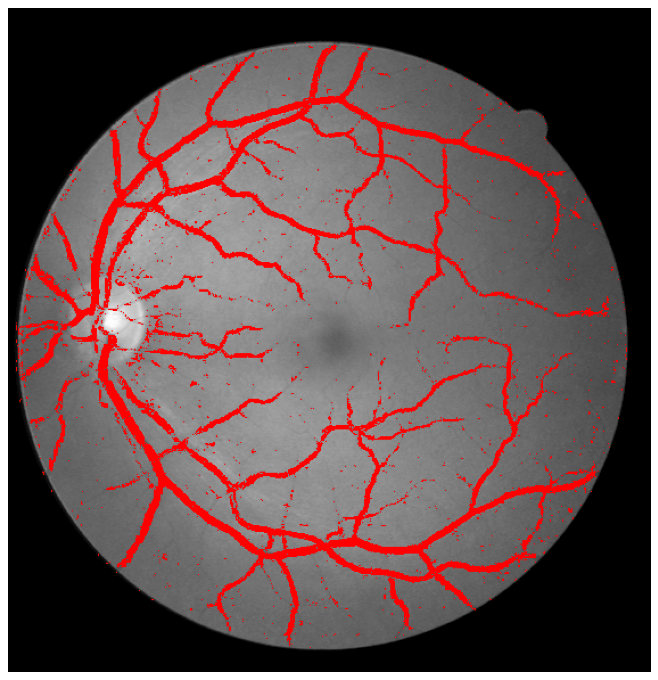

Accuracy score: 0.9268140546720608

F1 score: 0.7046678768459923

Confusion matrix:

     t/p      0     1 
        0 1143996 43549 
        1 56182 118980 
Sensivity: 0.6792569164544822
Specificity: 0.963328547549777


(0.927, 0.705, 1143996, 43549, 56182, 118980)

In [27]:
features = {
    'x_train': df_train.drop(columns=remove_list),
    'x_test': df_test.drop(columns=remove_list),
    'y_train': y_train,
    'y_test': y_test
}

from main import main
main(lgb='Num', features=features, plot_once=True)